In [1]:
# 1. Enliste todas las librerías que utilizará
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
# 2. Importación y revisión de los datos
data2009 = pd.read_csv("/content/2009_1perc.csv")

data2010 = pd.read_csv("/content/2010_1perc.csv")

In [3]:
# Se unen los dataframe
df = pd.concat([data2009, data2010], axis=0)

df.info(verbose=True, show_counts=True)

# Tenemos 112 columas con 11825 filas, las columnas stinter y premname tienen 1 solo dato faltante cada uno
# Hay tres tipos de datos en nuestro dataset: object, float e int

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11825 entries, 0 to 6012
Data columns (total 112 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Unnamed: 0  11825 non-null  int64  
 1    year        11825 non-null  int64  
 2    pct         11825 non-null  int64  
 3    ser_num     11825 non-null  int64  
 4    datestop    11825 non-null  int64  
 5    timestop    11825 non-null  int64  
 6    recstat     11825 non-null  object 
 7    inout       11825 non-null  object 
 8    trhsloc     11825 non-null  object 
 9    perobs      11825 non-null  float64
 10   crimsusp    11825 non-null  object 
 11   perstop     11825 non-null  int64  
 12   typeofid    11825 non-null  object 
 13   explnstp    11825 non-null  object 
 14   othpers     11825 non-null  object 
 15   arstmade    11825 non-null  object 
 16   arstoffn    11825 non-null  object 
 17   sumissue    11825 non-null  object 
 18   sumoffen    11825 non-null  object 
 19   com

In [4]:
df.describe(percentiles=[0.1,0.25,0.75,0.95])

# Hay 17 variables numericas
# Algunas cosas que podemos destacar es que el maximo de la edad debe ser un valor erróneo ya que no existen personas de 999 años, lo cual debe revisarse
# A su vez, no pueden haber controlado a una persona de 1 año (minimo de edad)
# El valor minimo del peso puede ser un dato atípico ya que es 1, y su maximo igualmente, ya que es 999
# compyear y comppct tiene todas sus categorías en cero, y es una variable de año, por lo que no debería tenerse en cuenta para el análisis y podrían ser aliminadas


,Unnamed: 0,year,pct,ser_num,datestop,timestop,perobs,perstop,compyear,comppct,repcmd,revcmd,dob,age,ht_feet,ht_inch,weight
count,11825.000000,11825.000000,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.0,11825.0,11825.000000,11825.000000,1.182500e+04,11825.000000,11825.000000,11825.000000,11825.000000
mean,295983.814799,2009.508499,68.625624,5697.994334,6.364221e+06,1413.725497,2.654391,5.649556,0.0,0.0,243.354926,238.986385,7.316195e+06,28.968541,5.183340,6.408034,170.093615
std,170820.705702,0.499949,33.037826,5152.486022,3.429091e+06,744.726359,9.759031,9.758535,0.0,0.0,297.788599,299.394740,3.729206e+06,29.205278,0.398801,3.405503,37.195884
min,52.000000,2009.000000,1.000000,1.000000,1.012009e+06,0.000000,0.000000,1.000000,0.0,0.0,1.000000,1.000000,1.011900e+06,1.000000,3.000000,0.000000,1.000000
10%,59751.400000,2009.000000,23.000000,792.400000,2.022010e+06,132.000000,1.000000,2.000000,0.0,0.0,41.000000,40.000000,2.081989e+06,17.000000,5.000000,1.000000,140.000000
25%,147515.000000,2009.000000,42.000000,2002.000000,3.232009e+06,1000.000000,1.000000,3.000000,0.0,0.0,70.000000,66.000000,4.121982e+06,19.000000,5.000000,4.000000,150.000000
50%,296652.000000,2010.000000,73.000000,4366.000000,6.162010e+06,1605.000000,1.000000,5.000000,0.0,0.0,105.000000,103.000000,7.261982e+06,25.000000,5.000000,7.000000,170.000000
75%,443097.000000,2010.000000,102.000000,7840.000000,9.232009e+06,2035.000000,3.000000,5.000000,0.0,0.0,177.000000,176.000000,1.105199e+07,34.000000,5.000000,9.000000,180.000000
95%,561538.400000,2010.000000,115.000000,16143.000000,1.205201e+07,2314.800000,6.000000,10.000000,0.0,0.0,862.000000,862.000000,1.231190e+07,51.000000,6.000000,11.000000,220.000000
max,601281.000000,2010.000000,123.000000,31694.000000,1.231201e+07,2830.000000,926.000000,857.000000,0.0,0.0,879.000000,879.000000,1.231200e+07,999.000000,7.000000,11.000000,999.000000


<ipython-input-5-5b64d1a7779c>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


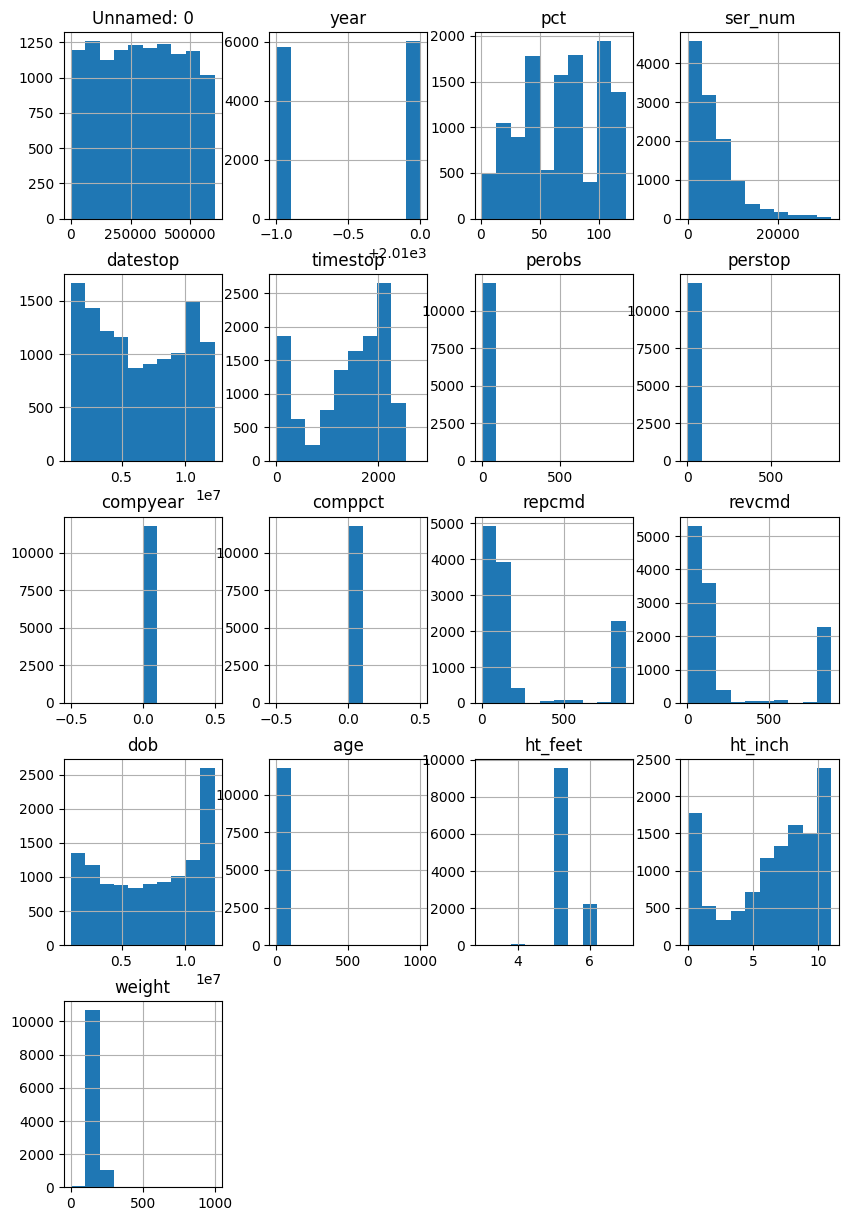

In [5]:
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
df.hist(ax=ax)
plt.show()
# Ninguna de las variables numericas siguen una distribución normal, ni tampoco se acercan a ellas, y como se puede ver en los gráficos,
# hay variables que tienen muy pocas categorías (1 o 2)

In [6]:
# 3. Preprocesamiento de datos

df_cat = df.select_dtypes("object")

lista_filtrado = [col for col in df_cat if 2 <= df_cat[col].nunique() <= 99]
df_cat = df_cat.loc[:, lista_filtrado]

print('La lista de las variables categoricas que tengan entre 2 y 99 categorias son', lista_filtrado)

La lista de las variables categoricas que tengan entre 2 y 99 categorias son ['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton', 'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves', 'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr', 'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv', 'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim', 'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd', 'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt', 'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm']


In [7]:
# Renombro mi data en caso de errores y no tener que volver tan atrás
df_clean = df_cat.copy()

In [8]:
df_clean['officrid'] = df_clean['officrid'].replace({' ':'N','I':'Y'})
df_clean['offshld'] = df_clean['offshld'].replace({' ':'N','S':'Y'})
df_clean['offverb'] = df_clean['offverb'].replace({' ':'N','V':'Y'})

df_clean.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,L,BRONX,G,7,CM,1
1,A,O,P,P,Y,Y,N,N,N,N,...,A,BK,BR,T,L,QUEENS,J,,CM,1
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,L,BRONX,E,,CM,1
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,L,BROOKLYN,J,4,CM,1
4,A,O,P,P,Y,Y,N,N,Y,N,...,Q,BK,BR,M,L,QUEENS,H,,CM,1


In [9]:
df_clean['sector'] = df_clean['sector'].replace({' ':'U'})
df_clean['trhsloc'] = df_clean['trhsloc'].replace({' ':'U'})
df_clean['beat'] = df_clean['beat'].replace({' ':'U'}).str.strip()

df_clean.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,addrtyp,city,sector,beat,dettypcm,linecm
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,L,BRONX,G,7,CM,1
1,A,O,P,P,Y,Y,N,N,N,N,...,A,BK,BR,T,L,QUEENS,J,U,CM,1
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,L,BRONX,E,U,CM,1
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,L,BROOKLYN,J,4,CM,1
4,A,O,P,P,Y,Y,N,N,Y,N,...,Q,BK,BR,M,L,QUEENS,H,U,CM,1


In [10]:
# Creación de variable metros
df_clean['meters'] = (df['ht_feet'] + df['ht_inch']/12) * 0.3048

df_clean['meters']

0       1.7526
1       1.6510
2       1.9050
3       1.6510
4       1.6764
         ...  
6008    1.7780
6009    1.7018
6010    1.8288
6011    1.8034
6012    1.8542
Name: meters, Length: 11825, dtype: float64

In [11]:
# Creación de variable mes y año
df_clean['month'] = pd.to_datetime(df['datestop'], format='%m%d%Y').dt.month

df_clean['year'] = pd.to_datetime(df['datestop'], format='%m%d%Y').dt.year

df_clean.head()

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,build,addrtyp,city,sector,beat,dettypcm,linecm,meters,month,year
0,A,O,P,P,Y,N,N,N,Y,N,...,M,L,BRONX,G,7,CM,1,1.7526,4,2009
1,A,O,P,P,Y,Y,N,N,N,N,...,T,L,QUEENS,J,U,CM,1,1.6510,10,2009
2,1,O,P,V,Y,N,N,N,N,N,...,M,L,BRONX,E,U,CM,1,1.9050,10,2009
3,A,O,P,P,Y,N,N,N,Y,N,...,T,L,BROOKLYN,J,4,CM,1,1.6510,12,2009
4,A,O,P,P,Y,Y,N,N,Y,N,...,M,L,QUEENS,H,U,CM,1,1.6764,12,2009


In [12]:
# Filtrar data por edad y renombrar tabla en caso de errores
df_clean['age'] = df['age']
df_filter = df_clean.copy()
df_filter = df_filter[(df_filter['age']>= 18) & (df_filter['age']<= 100)]

df_filter

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,addrtyp,city,sector,beat,dettypcm,linecm,meters,month,year,age
0,A,O,P,P,Y,N,N,N,Y,N,...,L,BRONX,G,7,CM,1,1.7526,4,2009,24
2,1,O,P,V,Y,N,N,N,N,N,...,L,BRONX,E,U,CM,1,1.9050,10,2009,21
3,A,O,P,P,Y,N,N,N,Y,N,...,L,BROOKLYN,J,4,CM,1,1.6510,12,2009,22
4,A,O,P,P,Y,Y,N,N,Y,N,...,L,QUEENS,H,U,CM,1,1.6764,12,2009,18
5,1,I,T,V,Y,N,N,N,N,Y,...,L,MANHATTAN,F,16,CM,1,1.7272,5,2009,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,O,P,P,Y,Y,N,N,N,N,...,L,QUEENS,A,U,CM,1,1.6764,6,2010,21
6008,1,O,H,P,Y,N,N,N,Y,N,...,L,BROOKLYN,I,U,CM,1,1.7780,9,2010,20
6009,A,O,P,R,Y,N,N,N,N,N,...,L,BROOKLYN,A,U,CM,1,1.7018,7,2010,23
6011,1,O,P,P,Y,N,N,N,N,Y,...,L,QUEENS,E,U,CM,1,1.8034,11,2010,19


N    93.589998
Y     6.410002
Name: arstmade, dtype: float64

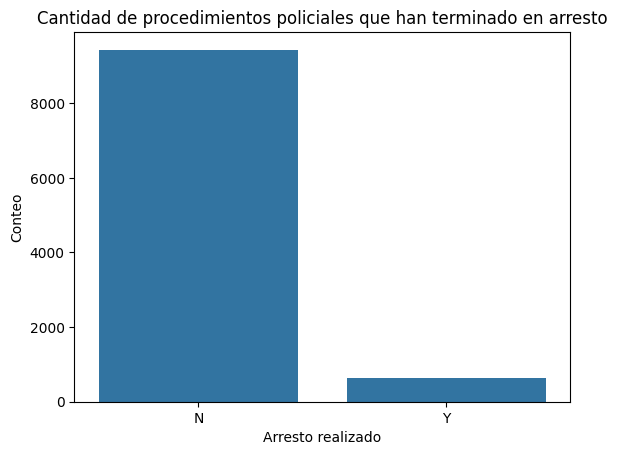

In [13]:
# 4. Analisis exploratorio
display(df_filter['arstmade'].value_counts(normalize=True).apply(lambda x: x*100))

print("\n ")
fig, ax = plt.subplots()
ax = sns.countplot(data=df_filter, x='arstmade')
ax.set_xlabel('Arresto realizado')
ax.set_ylabel('Conteo')
ax.set_title('Cantidad de procedimientos policiales que han terminado en arresto')
plt.show()

# De 10.078 procedimientos, 9.432 (93,59%) no terminaron en arresto, mientras que 646 si terminaron en arresto (6,41%)


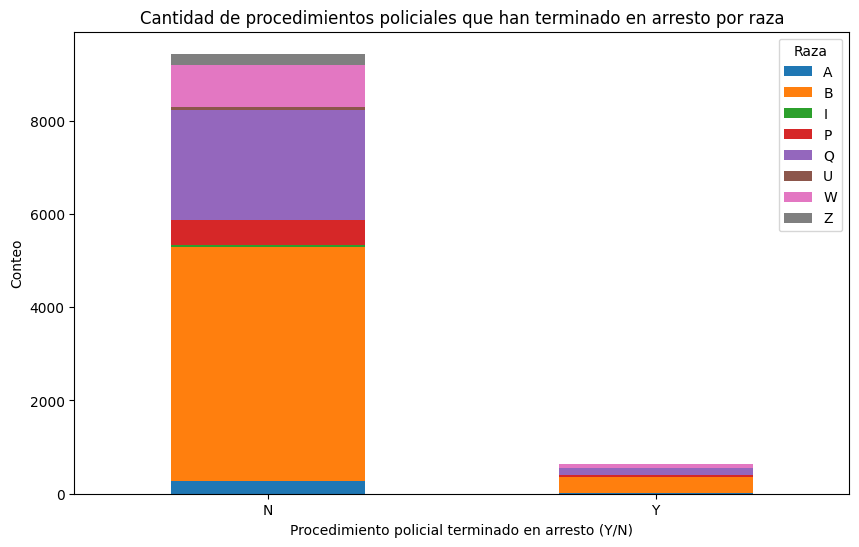

In [14]:
conteo = df_filter.groupby(['arstmade', 'race']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
conteo.plot(kind='bar', stacked=True, ax=ax)
plt.title('Cantidad de procedimientos policiales que han terminado en arresto por raza')
plt.xlabel('Procedimiento policial terminado en arresto (Y/N)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
ax.legend(title='Raza')
plt.show()

# De 10.078 procedimientos, las razas que más fueron controladas y no fueron arrestadas fueron negro (B), blanco-hispano (Q) y blanco (W)
# Las razas que más fueron controladas y el procedimiento si terminó en arresto fueron negro (B), blanco-hispano (Q) y blanco (W)
# Las razas que menos fueron controladas y no fueron arrestadas son indio americano (I) y desconocido (U)
# Las razas que menos fueron controladas y el procedimiento si terminó en arresto son indio americano (I) y desconocido (U)
# La raza negra es la más sometida a procedimientos policiales, seguido de blanco-hispano y blancos

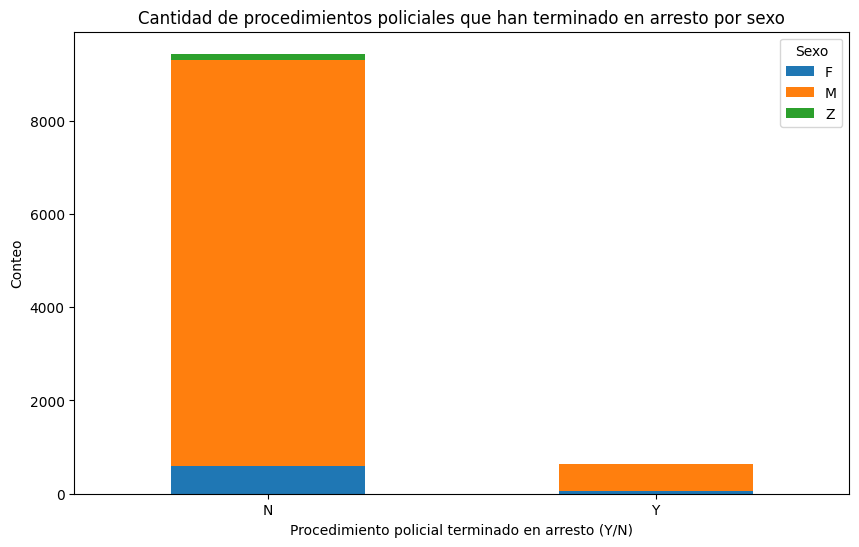

In [15]:
conteo = df_filter.groupby(['arstmade', 'sex']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
conteo.plot(kind='bar', stacked=True, ax=ax)
plt.title('Cantidad de procedimientos policiales que han terminado en arresto por sexo')
plt.xlabel('Procedimiento policial terminado en arresto (Y/N)')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
ax.legend(title='Sexo')
plt.show()

# Del total de procedimientos policiales, de los que no terminaron en arresto, 92% fueron hombres, seguido por 6,2% de mujeres y el resto es sexo desconocido
# Del total de procedimientos policiales, de los que terminaron en arresto, 88,85% fueron hombres, seguido por 9,9% de mujeres y el resto es sexo desconocido
# Los hombres son los que tienen mayor procedimientos policiales

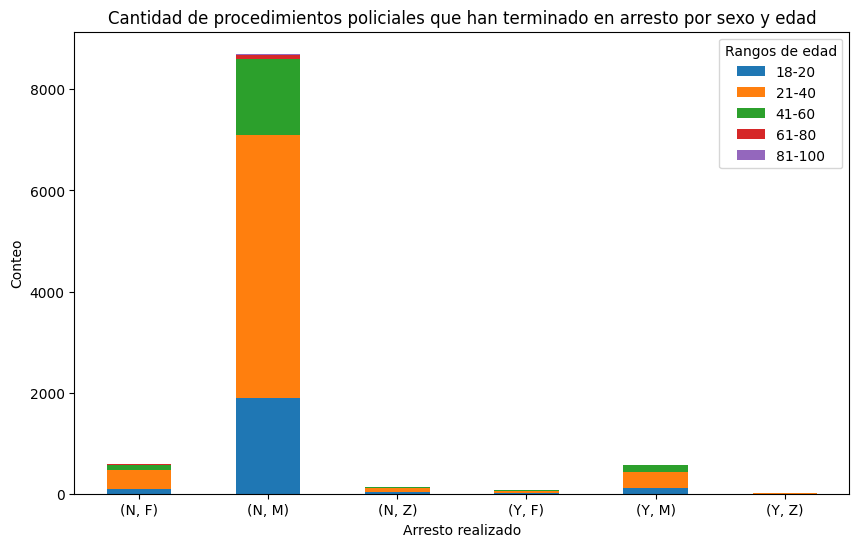

In [16]:
#df_filter['age'].hist()

bins = [0, 20, 40, 60, 80, 150]
labels = ['18-20', '21-40', '41-60', '61-80', '81-100']
df_filter['age_bin'] = pd.cut(df_filter['age'], bins, labels=labels)


counts = df_filter.groupby(['arstmade', 'sex', 'age_bin']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
counts.plot(kind='bar', stacked=True, ax=ax)
plt.title('Cantidad de procedimientos policiales que han terminado en arresto por sexo y edad')
plt.xlabel('Arresto realizado')
plt.ylabel('Conteo')
plt.xticks(rotation=0)
ax.legend(title='Rangos de edad')
plt.show()


# De los procedimientos que no terminaron en arresto:
#     Las mujeres de 21 a 40 años, seguida por las mujeres de 41 a 60 años fueron las más sometidas a procedimientos
#     Los hombres de 21 a 40 años, seguido por los hombres de 18 a 20 años fueron los más sometidos a procedimientos
#     El sexo desconocido, de 21 a 40 años, seguido por 18 a 20 años fueron los más sometidos a procedimientos
# De los procedimientos que terminaron en arresto:
#     Las mujeres que más fueron arrestadas están entre los 21 a 40 años, seguidas de las mujeres entre 41 a 60 años
#     Los hombres que más fueron arrestados están entre los 21 a 40 años, seguidas de los hombres entre 41 a 60 años
#     El sexo desconocido, de 21 a 40 años, seguido por 41 a 60 años fueron arrestados

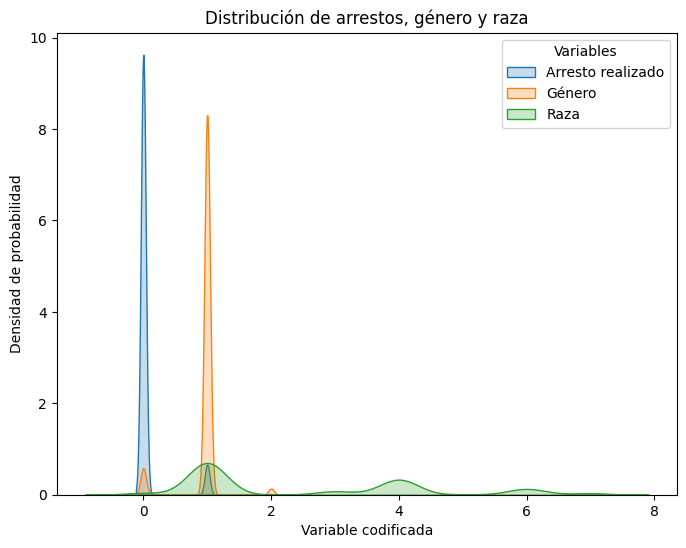

In [17]:
df_filter_kde = df_filter.copy()
df_filter_kde = df_filter_kde[['arstmade','sex','race']]

# Usando Encoder para las variables
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df_filter_kde = df_filter_kde.apply(le.fit_transform)
#df_filter_kde.head()

fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=df_filter_kde, x='arstmade', fill=True, common_norm=False, ax=ax, label='Arresto realizado')
sns.kdeplot(data=df_filter_kde, x='sex', fill=True, common_norm=False, ax=ax, label='Género')
sns.kdeplot(data=df_filter_kde, x='race', fill=True, common_norm=False, ax=ax, label='Raza')
ax.set_title('Distribución de arrestos, género y raza')
ax.set_xlabel('Variable codificada')
ax.set_ylabel('Densidad de probabilidad')
ax.legend(title='Variables')

plt.show()

In [45]:
# 5. Determinar si el procedimiento policial concluirá en alguna acción violenta
df_filter['violencia'] = (df_filter['pf_hands']=='Y') | (df_filter['pf_wall']=='Y') | (df_filter['pf_grnd']=='Y') | (df_filter['pf_drwep']=='Y') | (df_filter['pf_ptwep']=='Y') | (df_filter['pf_baton']=='Y') | (df_filter['pf_hcuff']=='Y') | (df_filter['pf_pepsp']=='Y') | (df_filter['pf_other']=='Y')
df_filter['violencia'] = df_filter['violencia'].astype(int)
porcentaje = df_filter['violencia'].value_counts(normalize=True).apply(lambda x: x*100)

print("El procentaje de casos que terminaron en violencia fueron",round(porcentaje[1],2),'%')

El procentaje de casos que terminaron en violencia fueron 24.18 %


In [46]:
df_filter['ac'] = (df_filter['ac_rept']=='Y') | (df_filter['ac_inves']=='Y') | (df_filter['ac_proxm']=='Y') | (df_filter['ac_evasv']=='Y') | (df_filter['ac_assoc']=='Y') | (df_filter['ac_cgdir']=='Y') | (df_filter['ac_incid']=='Y') | (df_filter['ac_time']=='Y') | (df_filter['ac_stsnd']=='Y') | (df_filter['ac_other']=='Y')
df_filter['ac'] = df_filter['ac'].astype(int)

df_filter['ac'].value_counts()

1    9152
0     926
Name: ac, dtype: int64

In [47]:
df_filter['rf'] = (df_filter['rf_vcrim']=='Y') | (df_filter['rf_othsw']=='Y') | (df_filter['rf_attir']=='Y') | (df_filter['rf_vcact']=='Y') | (df_filter['rf_rfcmp']=='Y') | (df_filter['rf_verbl']=='Y') | (df_filter['rf_knowl']=='Y') | (df_filter['rf_furt']=='Y') | (df_filter['rf_bulg']=='Y')
df_filter['rf'] = df_filter['rf'].astype(int)

df_filter['rf'].value_counts()

1    5604
0    4474
Name: rf, dtype: int64

In [48]:
df_filter['sb'] = (df_filter['sb_hdobj']=='Y') | (df_filter['sb_outln']=='Y') | (df_filter['sb_admis']=='Y') | (df_filter['sb_other']=='Y')
df_filter['sb'] = df_filter['sb'].astype(int)

df_filter['sb'].value_counts()

0    9204
1     874
Name: sb, dtype: int64

In [49]:
df_filter['cs'] = (df_filter['cs_objcs']=='Y') | (df_filter['cs_descr']=='Y') | (df_filter['cs_casng']=='Y') | (df_filter['cs_lkout']=='Y') | (df_filter['cs_cloth']=='Y') | (df_filter['cs_drgtr']=='Y') | (df_filter['cs_furtv']=='Y') | (df_filter['cs_vcrim']=='Y') | (df_filter['cs_bulge']=='Y') | (df_filter['cs_other']=='Y')
df_filter['cs'] = df_filter['cs'].astype(int)

df_filter['cs'].value_counts()

1    10078
Name: cs, dtype: int64

In [50]:
df_filter.columns

Index(['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers',
       'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched',
       'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap',
       'pf_hands', 'pf_wall', 'pf_grnd', 'pf_drwep', 'pf_ptwep', 'pf_baton',
       'pf_hcuff', 'pf_pepsp', 'pf_other', 'radio', 'ac_rept', 'ac_inves',
       'rf_vcrim', 'rf_othsw', 'ac_proxm', 'rf_attir', 'cs_objcs', 'cs_descr',
       'cs_casng', 'cs_lkout', 'rf_vcact', 'cs_cloth', 'cs_drgtr', 'ac_evasv',
       'ac_assoc', 'cs_furtv', 'rf_rfcmp', 'ac_cgdir', 'rf_verbl', 'cs_vcrim',
       'cs_bulge', 'cs_other', 'ac_incid', 'ac_time', 'rf_knowl', 'ac_stsnd',
       'ac_other', 'sb_hdobj', 'sb_outln', 'sb_admis', 'sb_other', 'rf_furt',
       'rf_bulg', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor',
       'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm',
       'meters', 'month', 'year', 'age', 'age_bin', 'violencia', 'ac', 'rf

In [51]:
# Renombro mi data en caso de errores y no tener que volver tan atrás
df_final = df_filter.copy()
df_final = df_final[['recstat', 'inout', 'trhsloc', 'typeofid', 'explnstp', 'othpers', 'arstmade', 'sumissue', 'offunif', 'officrid', 'frisked', 'searched', 'contrabn', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'othrweap', 'violencia', 'radio', 'ac', 'rf', 'cs', 'sb', 'offverb', 'offshld', 'sex', 'race', 'haircolr', 'eyecolor', 'build', 'addrtyp', 'city', 'sector', 'beat', 'dettypcm', 'linecm','month','year','meters','age']]
df_final.head() #con este dataframe trabajaré los modelos

,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,addrtyp,city,sector,beat,dettypcm,linecm,month,year,meters,age
0,A,O,P,P,Y,N,0,N,Y,N,...,L,BRONX,G,7,CM,1,4,2009,1.7526,24
2,1,O,P,V,Y,N,0,N,N,N,...,L,BRONX,E,U,CM,1,10,2009,1.9050,21
3,A,O,P,P,Y,N,0,N,Y,N,...,L,BROOKLYN,J,4,CM,1,12,2009,1.6510,22
4,A,O,P,P,Y,Y,0,N,Y,N,...,L,QUEENS,H,U,CM,1,12,2009,1.6764,18
5,1,I,T,V,Y,N,0,N,N,Y,...,L,MANHATTAN,F,16,CM,1,5,2009,1.7272,47


In [52]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10078 entries, 0 to 6012
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recstat    10078 non-null  object 
 1   inout      10078 non-null  object 
 2   trhsloc    10078 non-null  object 
 3   typeofid   10078 non-null  object 
 4   explnstp   10078 non-null  object 
 5   othpers    10078 non-null  object 
 6   arstmade   10078 non-null  int64  
 7   sumissue   10078 non-null  object 
 8   offunif    10078 non-null  object 
 9   officrid   10078 non-null  object 
 10  frisked    10078 non-null  object 
 11  searched   10078 non-null  object 
 12  contrabn   10078 non-null  object 
 13  pistol     10078 non-null  object 
 14  riflshot   10078 non-null  object 
 15  asltweap   10078 non-null  object 
 16  knifcuti   10078 non-null  object 
 17  othrweap   10078 non-null  object 
 18  violencia  10078 non-null  int64  
 19  radio      10078 non-null  object 
 20  ac     

In [53]:
df_final['linecm'] = df_final['linecm'].astype(str)
df_final['linecm'].unique()

array(['1', ' '], dtype=object)

In [54]:
df_final['inout'] = df_final['inout'].map({'O':0,'I':1})
df_filter['arstmade'] = df_filter['arstmade'].map({'N':0,'Y':1})
df_final['explnstp'] = df_final['explnstp'].map({'N':0,'Y':1})
df_final['othpers'] = df_final['othpers'].map({'N':0,'Y':1})
df_final['sumissue'] = df_final['sumissue'].map({'N':0,'Y':1})
df_final['officrid'] = df_final['officrid'].map({'N':0,'Y':1})
df_final['frisked'] = df_final['frisked'].map({'N':0,'Y':1})
df_final['searched'] = df_final['searched'].map({'N':0,'Y':1})
df_final['contrabn'] = df_final['contrabn'].map({'N':0,'Y':1})
df_final['pistol'] = df_final['pistol'].map({'N':0,'Y':1})
df_final['riflshot'] = df_final['riflshot'].map({'N':0,'Y':1})
df_final['recstat'] = df_final['recstat'].map({'A':0, '1':1})
df_final['offunif'] = df_final['offunif'].map({'N':0,'Y':1})
df_final['asltweap'] = df_final['asltweap'].map({'N':0,'Y':1})
df_final['knifcuti'] = df_final['knifcuti'].map({'N':0,'Y':1})
df_final['othrweap'] = df_final['othrweap'].map({'N':0,'Y':1})
df_final['radio'] = df_final['radio'].map({'N':0,'Y':1})
df_final['offverb'] = df_final['offverb'].map({'N':0,'Y':1})
df_final['offshld'] = df_final['offshld'].map({'N':0,'Y':1})
df_final['addrtyp'] = df_final['addrtyp'].map({' ':0, 'L':1})
df_final['dettypcm'] = df_final['dettypcm'].map({' ':0, 'CM':0})
df_final['linecm'] = df_final['linecm'].map({' ':0, '1':1})
df_final = pd.get_dummies(df_final, columns=['sex'], prefix='sex')
df_final = pd.get_dummies(df_final, columns=['trhsloc'], prefix='trhsloc')
df_final = pd.get_dummies(df_final, columns=['typeofid'], prefix='typeofid')
df_final = pd.get_dummies(df_final, columns=['race'], prefix='race')
df_final = pd.get_dummies(df_final, columns=['haircolr'], prefix='haircolr')
df_final = pd.get_dummies(df_final, columns=['eyecolor'], prefix='eyecolor')
df_final = pd.get_dummies(df_final, columns=['build'], prefix='build')
df_final = pd.get_dummies(df_final, columns=['city'], prefix='city')
df_final = pd.get_dummies(df_final, columns=['sector'], prefix='sector')
df_final = pd.get_dummies(df_final, columns=['beat'], prefix='beat')
df_final

,recstat,inout,explnstp,othpers,arstmade,sumissue,offunif,officrid,frisked,searched,...,beat_41,beat_42,beat_5,beat_6,beat_61,beat_62,beat_7,beat_8,beat_9,beat_U
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,1,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6008,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6009,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6011,1,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


# Random Forest

In [55]:
# Separación de data
df_train = df_final[df_final['year']==2009]
df_test = df_final[df_final['year']==2010]

x_train = df_train.drop('arstmade', axis=1)
y_train = df_train['arstmade']

x_test = df_test.drop('arstmade',axis=1)
y_test = df_test['arstmade']

In [56]:
# Ajuste de hiperparametros - validacion cruzada

param_dist = {'n_estimators': randint(50,1000),
              'max_depth': randint(1,20)}

# Se crea un Arbol Aleatorio de clasificación
rf = RandomForestClassifier()

# Se aleatoriza para encontrar el mejor hiperparámetro
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Ajustamos nuevamente el modelo a nuestra base de entrenamiento
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db1bb9b80a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7db1bb9bb940>})

In [57]:
# Se crea una variable para el mejor modelo
best_rf = rand_search.best_estimator_

# El mejor hiperparámetro
print('El mejor hiperparámetro:',  rand_search.best_params_)

El mejor hiperparámetro: {'max_depth': 16, 'n_estimators': 208}


In [58]:
# Ajuste del modelo

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [59]:
# Predicciones

y_pred = best_rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9495187585935966


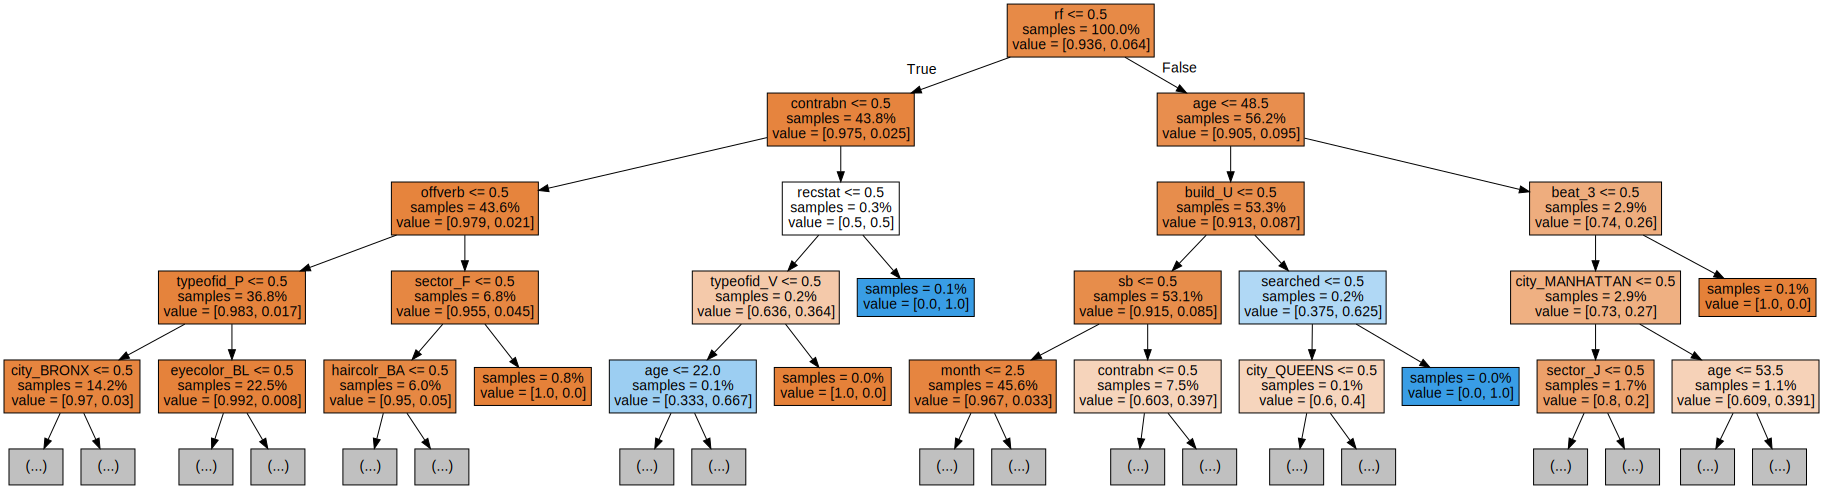

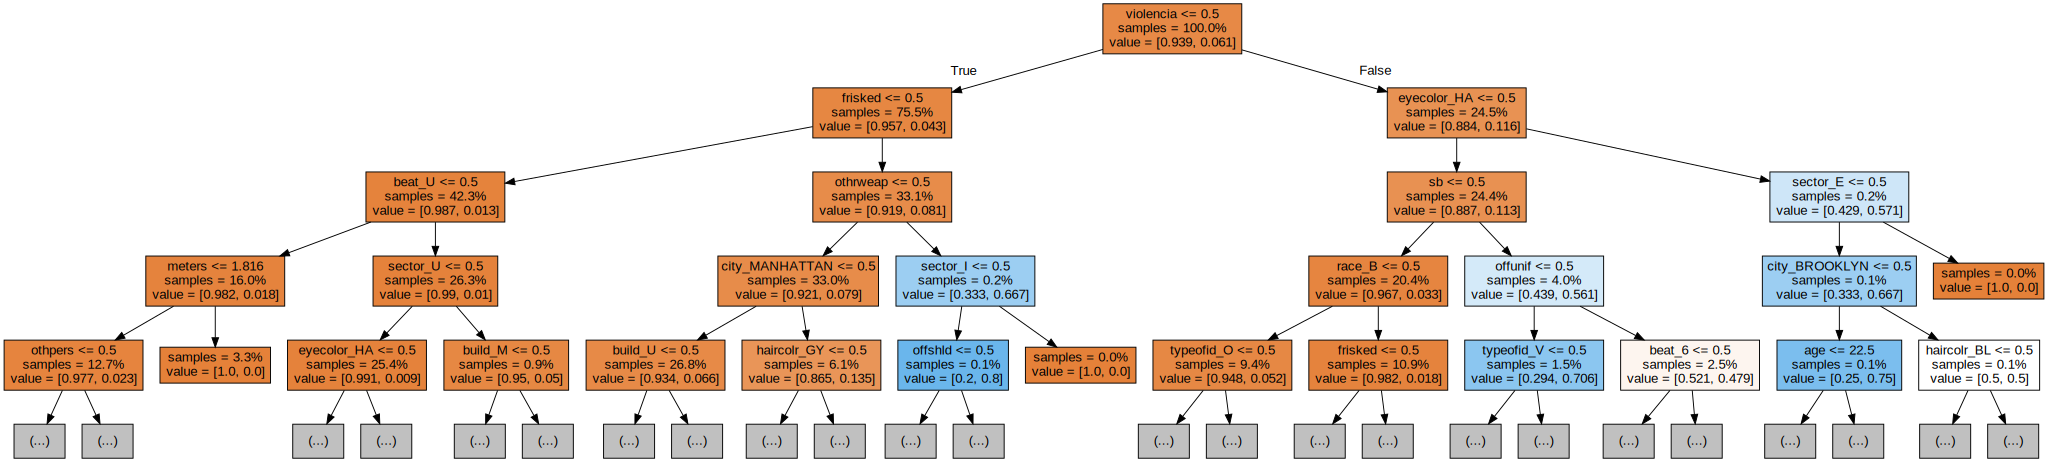

In [60]:
for i in range(2):
    tree = best_rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,
                               filled=True,
                               max_depth=4,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

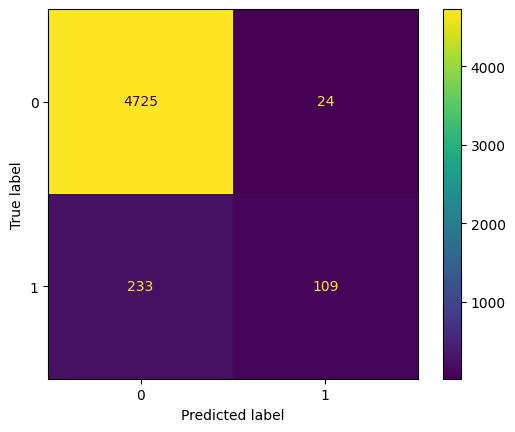

In [61]:
# matriz de confusion
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [62]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9495187585935966
Precision: 0.8195488721804511
Recall: 0.31871345029239767


# Gradient Boosting

In [63]:
# Separación de data
df_train = df_final[df_final['year']==2009]
df_test = df_final[df_final['year']==2010]

x_train = df_train.drop('arstmade', axis=1)
y_train = df_train['arstmade']

x_test = df_test.drop('arstmade',axis=1)
y_test = df_test['arstmade']



In [64]:
# Ahora tenemos que crear un nuevo conjunto de datos concatenado:
full_data = df_train.append(df_test)

<ipython-input-64-4226aed6cf38>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_data = df_train.append(df_test)


In [65]:
x_train.shape, x_test.shape

((4987, 136), (5091, 136))

In [66]:
print(f'{round(4987/(4987+5091)*100,2)}', '%', 'Data de Entrenamiento')

49.48 % Data de Entrenamiento


In [67]:
# Initialize the Gradient Boosting model

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_model = GradientBoostingClassifier(
        n_estimators=20,
        learning_rate=learning_rate,
        max_features=2,
        max_depth=2,
        random_state=0)
    gb_model.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_model.score(x_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_model.score(x_test, y_test)))
    print(' ')

Learning rate:  0.05
Accuracy score (training): 0.939
Accuracy score (validation): 0.933
 
Learning rate:  0.075
Accuracy score (training): 0.939
Accuracy score (validation): 0.933
 
Learning rate:  0.1
Accuracy score (training): 0.939
Accuracy score (validation): 0.933
 
Learning rate:  0.25
Accuracy score (training): 0.950
Accuracy score (validation): 0.946
 
Learning rate:  0.5
Accuracy score (training): 0.951
Accuracy score (validation): 0.946
 
Learning rate:  0.75
Accuracy score (training): 0.939
Accuracy score (validation): 0.933
 
Learning rate:  1
Accuracy score (training): 0.937
Accuracy score (validation): 0.929
 


In [68]:
# Fit the model to the training data
# utilicé learning rate de 0.5 porque luego el accuracy del entrenamiento y validación van bajando
gb_model2 = GradientBoostingClassifier(
    n_estimators=20,
    learning_rate=0.5,
    max_features=2,
    max_depth=2,
    random_state=0)

gb_model2.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_model2.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")

Accuracy: 0.9461795325083481


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4749
           1       0.71      0.34      0.46       342

    accuracy                           0.95      5091
   macro avg       0.83      0.66      0.72      5091
weighted avg       0.94      0.95      0.94      5091



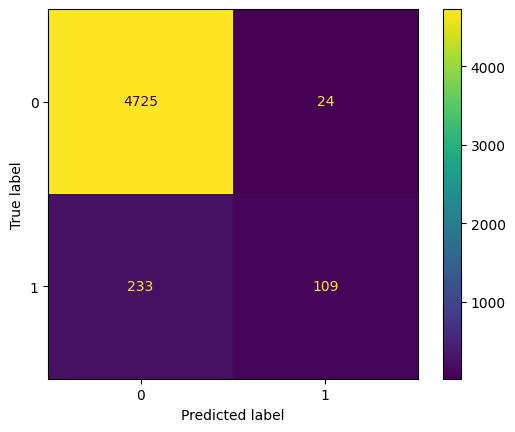

In [69]:
print("Classification Report")
print(classification_report(y_test, y_pred))


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# El modelo tiene una precisión de 0.96 y 0.7 para nuestros datos arstmade

# XGBoost

In [70]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
score = xgb_clf.score(x_test, y_test)
print(score)

0.9516794342958161


In [72]:
# Make predictions on the test set
y_pred = xgb_clf.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")

Accuracy: 0.9516794342958161


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      4749
           1       0.70      0.49      0.58       342

    accuracy                           0.95      5091
   macro avg       0.83      0.74      0.78      5091
weighted avg       0.95      0.95      0.95      5091



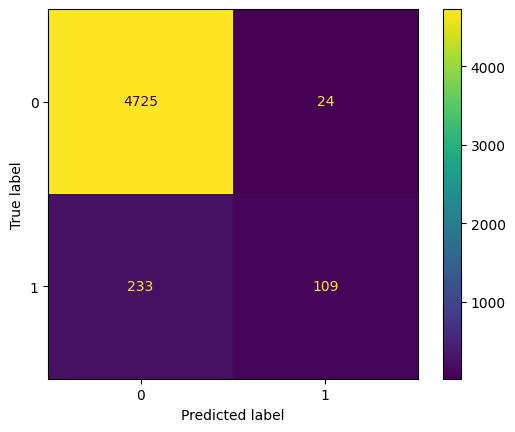

In [73]:
print("Classification Report")
print(classification_report(y_test, y_pred))


ConfusionMatrixDisplay(confusion_matrix=cm).plot();

# El modelo tiene una precisión de 0.96 y 0.7 para nuestros datos arstmade

# Curva ROC

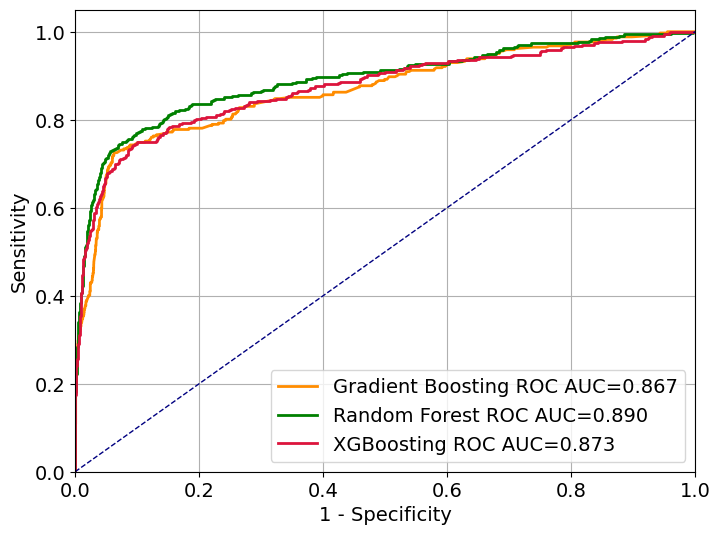

In [74]:
# Random Forest Classifier
y_prob_rf = best_rf.predict_proba(x_test)[:,1]

# Gradient Boosting Classifier
y_prob_gb = gb_model2.predict_proba(x_test)[:, 1]

# XGBoost Classifier
y_prob_xgb = xgb_clf.predict_proba(x_test)[:, 1]

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_gb)
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='Gradient Boosting ROC AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_rf)
plt.plot(fpr, tpr, color='green', lw=2,
         label='Random Forest ROC AUC={0:.3f}'.format(roc_auc))
fpr, tpr, roc_auc = roc_curve_and_score(y_test, y_prob_xgb)
plt.plot(fpr, tpr, color='crimson', lw=2,
         label='XGBoosting ROC AUC={0:.3f}'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.show()

# El modelo que mejor se ajusta a nuestros datos para clasificarlos es random forest, seguido de XGBoosting y finalmente Gradient Boosting
# Esto porque mientras más cercano a 1 es nuestra área bajo la curva ROC, mayor accuracy tiene el modelo
# La curva ROC ideal tiene un AUC = 1.0

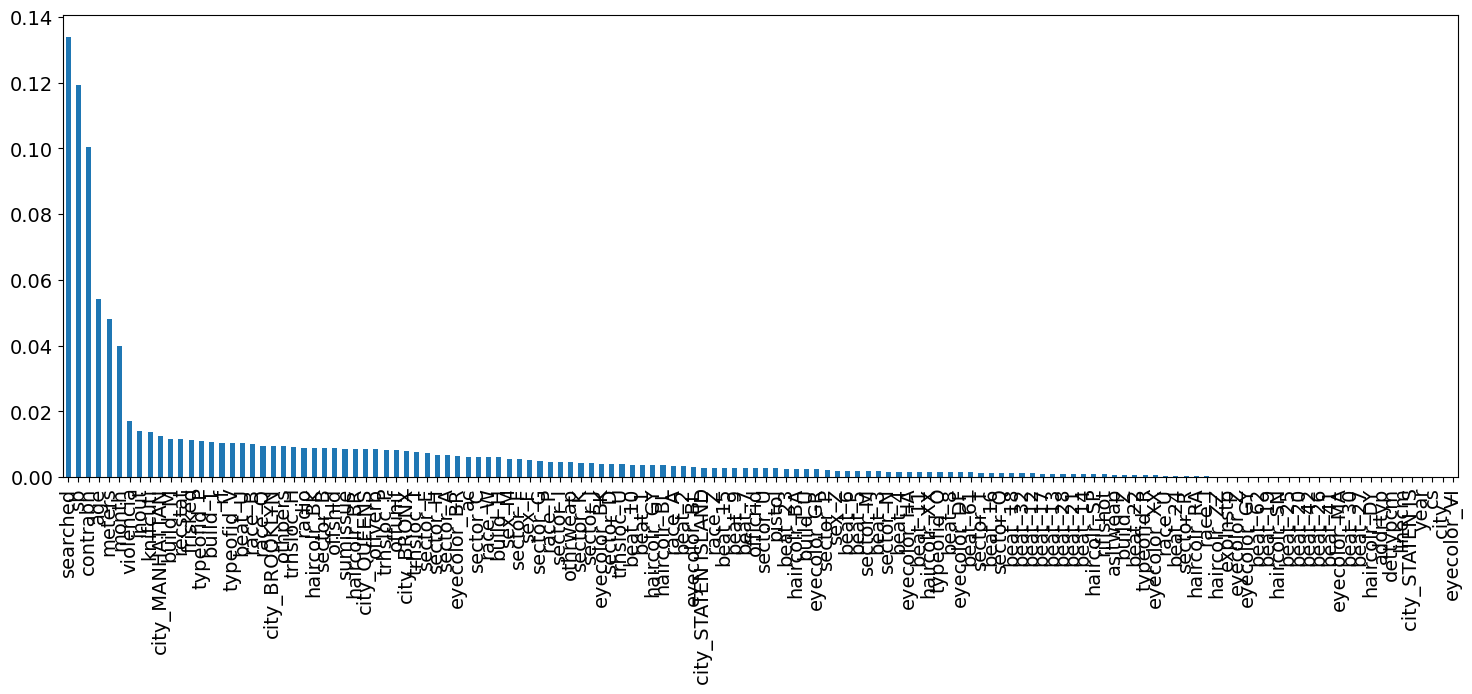

In [75]:
# Variables que demuestran la importancia de las variables del modelo
feature_importances = pd.Series(best_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# Grafico de barras
fig, ax = plt.subplots(figsize=(18, 6))
feature_importances.plot.bar();

# Para mejorar la predicción de los modelos, podemos descartar algunas variables que no aportan
# Esto nos dice que las variables searched, sb, contraband, age, fueron el mayor predictor de si el procedimiento terminó en arresto